In [7]:
%pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display
import json

In [20]:
all_coins = np.array(os.listdir('./smallcsv/'))
all_coins_names = [os.path.splitext(coin)[0] for coin in all_coins]
all_coins_names_array = np.array(all_coins_names)
json_file_path = 'all_coins_names.json'
with open(json_file_path, 'w') as json_file:
    json.dump(all_coins_names_array.tolist(), json_file)
all_coins_names

['Aeternity',
 'Aion',
 'Algorand',
 'ASTA',
 'Auto',
 'Avalanche',
 'AXEL',
 'BarnBridge',
 'Bitcoin',
 'BitTorrent',
 'BORA',
 'Bread',
 'Carry',
 'Cellframe',
 'ChainX',
 'Chiliz',
 'Civic',
 'Conflux',
 'Convergence',
 'Cortex',
 'DAD',
 'Dash',
 'Dent',
 'Dock',
 'Dogecoin',
 'Dogelon Mars',
 'EFFORCE',
 'Elitium',
 'Ethereum Classic',
 'Ethereum',
 'Everest',
 'Exeedme',
 'Fantom',
 'FLETA',
 'ForTube',
 'Frontier',
 'Fusion',
 'Gala',
 'GAMEE',
 'Gitcoin',
 'Glitch',
 'Handshake',
 'Helium',
 'HEX',
 'Holo',
 'HUNT',
 'Hydra',
 'IOST',
 'IOTA',
 'Kin',
 'Klever',
 'Komodo',
 'Kusama',
 'Lamden',
 'LATOKEN',
 'Lightning',
 'Linear',
 'LINK',
 'Liquity',
 'Litecoin',
 'Lotto',
 'Marlin',
 'MATH',
 'MCO',
 'Metadium',
 'Metal',
 'Mist',
 'Monero',
 'MXC',
 'Neo',
 'Nexo',
 'Nexus',
 'OKB',
 'Opacity',
 'Oxen',
 'Oxygen',
 'Pangolin',
 'Polygon',
 'Populous',
 'Propy',
 'Proton',
 'Qcash',
 'Qtum',
 'Rarible',
 'Ravencoin',
 'Ren',
 'Request',
 'Secret',
 'SHIBA INU',
 'SIX',
 'Sola

In [21]:
data = pd.read_csv('./smallcsv/'+all_coins[7])
del data['Unnamed: 0']
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,2021-12-06,21.17,23.36,17.89,19.87,33262890.0,101063299.0,5086225.0
1,2021-12-05,22.88,23.60,20.59,21.17,12966460.0,107247196.0,5065998.0
2,2021-12-04,24.47,24.54,20.08,22.88,22692406.0,115875388.0,5064483.0
3,2021-12-03,26.06,26.95,24.02,24.52,28232644.0,124087405.0,5060660.0
4,2021-12-02,25.33,30.12,24.63,26.04,48118477.0,131660677.0,5056093.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,2021-12-06,21.17,23.36,17.89,19.87,33262890.0,101063299.0,5086225.0
1,2021-12-05,22.88,23.60,20.59,21.17,12966460.0,107247196.0,5065998.0
2,2021-12-04,24.47,24.54,20.08,22.88,22692406.0,115875388.0,5064483.0
3,2021-12-03,26.06,26.95,24.02,24.52,28232644.0,124087405.0,5060660.0
4,2021-12-02,25.33,30.12,24.63,26.04,48118477.0,131660677.0,5056093.0
...,...,...,...,...,...,...,...,...
402,2020-10-30,138.10,147.19,137.98,145.50,1138718.0,6570573.0,45158.0
403,2020-10-29,128.00,141.51,124.10,138.10,738282.0,6236221.0,45157.0
404,2020-10-28,137.54,147.70,127.19,128.00,2663917.0,5780219.0,45157.0
405,2020-10-27,177.79,185.93,109.83,137.54,4131186.0,0.0,0.0


In [ ]:
def change_in_day(data):
    day_change = ((data.iloc[0]['Close'] - data.iloc[1]['Close'])/data.iloc[1]['Close'])*100
    return day_change

In [ ]:
def change_in_week(data):
    last_week = 0
    last_2ndweek = 0
    for i in range(0,7):
        last_week += data.iloc[i]['Close']
        last_2ndweek += data.iloc[i+7]['Close']
    week_change = ((last_week - last_2ndweek)/last_2ndweek)*100
    return week_change

In [ ]:
def change_in_month(data):
    last_month = 0
    last_2ndmonth = 0
    for i in range(0, 30):
        last_month += data.iloc[i]['Close']
        last_2ndmonth += data.iloc[i+30]['Close']

    # last_month/30, last_2ndmonth/30
    month_change = ((last_month - last_2ndmonth)/last_2ndmonth)*100
    return month_change

In [ ]:
def change_in_year(data):
    last_year = 0
    last_2ndyear = 0
    count = 0;
    for i in range(0, (data.shape[0])//2):
        last_year += data.iloc[i]['Close']
        if i+(data.shape[0])//2 <= data.shape[0]:
            count += 1
            last_2ndyear += data.iloc[i+(data.shape[0])//2]['Close']
    last_year = last_year/365 
    last_2ndyear = last_2ndyear/365
    year_change = ((last_year - last_2ndyear)/last_2ndyear) * 10
    return year_change

In [ ]:
(data.shape[0])//2

153

In [ ]:
change_in_year(data)

-6.498026697039344

In [ ]:
results_list = []

for i, val in enumerate(all_coins):
    try:
        data = pd.read_csv('../db/crypt-db/' + val)
        del data['Unnamed: 0']
        coin_name = all_coins_names[i]
        change_day = change_in_day(data)
        change_week = change_in_week(data)
        change_month = change_in_month(data)
        change_year = change_in_year(data)
        results_list.append({
            'coin_name': coin_name,
            'change_day': change_day,
            'change_week': change_week,
            'change_month': change_month,
            'change_year': change_year
        })
    except Exception as e:
        print(f"Error processing data for {val}: {e}")
        print("Data causing the error:")
        print(data)
        break

json_file_path = '../jsons/change_in_crypto.json'
with open(json_file_path, 'w') as json_file:
    json.dump(results_list, json_file)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,2021-12-06,0.1387,0.1534,0.10660,0.1159,4289444.0,27860845.0,240386928.0
1,2021-12-05,0.1149,0.1515,0.10300,0.1387,5447908.0,33337417.0,240356286.0
2,2021-12-04,0.1102,0.1171,0.08455,0.1149,3101569.0,27622283.0,240402811.0
3,2021-12-03,0.1308,0.1384,0.08904,0.1102,5280885.0,26486922.0,240353194.0
4,2021-12-02,0.1511,0.1579,0.12850,0.1307,3072781.0,31431974.0,240489472.0


In [ ]:
data.iloc[0].to_json()

'{"Date":"2021-12-06","Open":0.1387,"High":0.1534,"Low":0.1066,"Close":0.1159,"Volume":4289444.0,"Market Cap":27860845.0,"Circulating Supply":240386928.0}'

In [ ]:
results_list = []
results_list.append({
    'coin_name': coin_name,
    'crypto_stats': data.iloc[0].to_json(),
})
json_file_path = '../jsons/crypto_stats.json'
with open(json_file_path, 'w') as json_file:
    json.dump(results_list, json_file)

In [ ]:
crypto_stats = []

for i, val in enumerate(all_coins):
    try:
        data = pd.read_csv('../db/crypt-db/' + val)
        del data['Unnamed: 0']
        coin_name = all_coins_names[i]
        
        crypto_stats.append({
            'coin_name': coin_name,
            'crypto_stats': data.iloc[0].to_dict(),
        })
    except Exception as e:
        print(data)
        break

json_file_path = '../jsons/crypto_stats.json'
with open(json_file_path, 'w') as json_file:
    json.dump(crypto_stats, json_file)

In [ ]:
df = pd.read_csv('../db/crypt-db/'+all_coins[7])
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,0,2021-12-06,21.17,23.36,17.89,19.87,33262890.0,101063299.0,5086225.0
1,1,2021-12-05,22.88,23.60,20.59,21.17,12966460.0,107247196.0,5065998.0
2,2,2021-12-04,24.47,24.54,20.08,22.88,22692406.0,115875388.0,5064483.0
3,3,2021-12-03,26.06,26.95,24.02,24.52,28232644.0,124087405.0,5060660.0
4,4,2021-12-02,25.33,30.12,24.63,26.04,48118477.0,131660677.0,5056093.0
...,...,...,...,...,...,...,...,...,...
402,402,2020-10-30,138.10,147.19,137.98,145.50,1138718.0,6570573.0,45158.0
403,403,2020-10-29,128.00,141.51,124.10,138.10,738282.0,6236221.0,45157.0
404,404,2020-10-28,137.54,147.70,127.19,128.00,2663917.0,5780219.0,45157.0
405,405,2020-10-27,177.79,185.93,109.83,137.54,4131186.0,0.0,0.0


In [ ]:
# Reverse dataframe rows and reset indices
df = df.iloc[::-1].reset_index(drop=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,406,2020-10-26,80.55,179.03,80.55,177.79,8942894.0,0.0,0.0
1,405,2020-10-27,177.79,185.93,109.83,137.54,4131186.0,0.0,0.0
2,404,2020-10-28,137.54,147.70,127.19,128.00,2663917.0,5780219.0,45157.0
3,403,2020-10-29,128.00,141.51,124.10,138.10,738282.0,6236221.0,45157.0
4,402,2020-10-30,138.10,147.19,137.98,145.50,1138718.0,6570573.0,45158.0
...,...,...,...,...,...,...,...,...,...
402,4,2021-12-02,25.33,30.12,24.63,26.04,48118477.0,131660677.0,5056093.0
403,3,2021-12-03,26.06,26.95,24.02,24.52,28232644.0,124087405.0,5060660.0
404,2,2021-12-04,24.47,24.54,20.08,22.88,22692406.0,115875388.0,5064483.0
405,1,2021-12-05,22.88,23.60,20.59,21.17,12966460.0,107247196.0,5065998.0


In [ ]:
del df['Unnamed: 0']
df

,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,2020-10-26,80.55,179.03,80.55,177.79,8942894.0,0.0,0.0
1,2020-10-27,177.79,185.93,109.83,137.54,4131186.0,0.0,0.0
2,2020-10-28,137.54,147.70,127.19,128.00,2663917.0,5780219.0,45157.0
3,2020-10-29,128.00,141.51,124.10,138.10,738282.0,6236221.0,45157.0
4,2020-10-30,138.10,147.19,137.98,145.50,1138718.0,6570573.0,45158.0
...,...,...,...,...,...,...,...,...
402,2021-12-02,25.33,30.12,24.63,26.04,48118477.0,131660677.0,5056093.0
403,2021-12-03,26.06,26.95,24.02,24.52,28232644.0,124087405.0,5060660.0
404,2021-12-04,24.47,24.54,20.08,22.88,22692406.0,115875388.0,5064483.0
405,2021-12-05,22.88,23.60,20.59,21.17,12966460.0,107247196.0,5065998.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
count,407.000000,407.000000,407.000000,407.000000,4.070000e+02,4.070000e+02,4.070000e+02
mean,36.992408,39.216830,34.799115,36.861425,1.051509e+07,8.420032e+07,2.597855e+06
std,19.431565,21.423826,17.060090,19.335226,2.246100e+07,4.384541e+07,1.597630e+06
min,16.770000,17.510000,14.770000,16.770000,5.481200e+04,0.000000e+00,0.000000e+00
25%,26.200000,27.380000,25.090000,26.160000,1.591207e+06,6.614861e+07,1.150927e+06
50%,29.890000,31.100000,28.300000,29.890000,3.768105e+06,9.403180e+07,2.482825e+06
75%,43.175000,45.670000,41.565000,43.175000,1.374843e+07,1.140664e+08,4.174176e+06
max,177.790000,185.930000,141.540000,177.790000,3.567423e+08,1.809906e+08,5.086225e+06


In [ ]:
%pip install --upgrade nbformat



  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [ ]:
data_list = data.to_dict(orient='records')
data_list

[{'Date': '2021-12-06',
  'Open': 0.1387,
  'High': 0.1534,
  'Low': 0.1066,
  'Close': 0.1159,
  'Volume': 4289444.0,
  'Market Cap': 27860845.0,
  'Circulating Supply': 240386928.0},
 {'Date': '2021-12-05',
  'Open': 0.1149,
  'High': 0.1515,
  'Low': 0.103,
  'Close': 0.1387,
  'Volume': 5447908.0,
  'Market Cap': 33337417.0,
  'Circulating Supply': 240356286.0},
 {'Date': '2021-12-04',
  'Open': 0.1102,
  'High': 0.1171,
  'Low': 0.08455,
  'Close': 0.1149,
  'Volume': 3101569.0,
  'Market Cap': 27622283.0,
  'Circulating Supply': 240402811.0},
 {'Date': '2021-12-03',
  'Open': 0.1308,
  'High': 0.1384,
  'Low': 0.08904,
  'Close': 0.1102,
  'Volume': 5280885.0,
  'Market Cap': 26486922.0,
  'Circulating Supply': 240353194.0},
 {'Date': '2021-12-02',
  'Open': 0.1511,
  'High': 0.1579,
  'Low': 0.1285,
  'Close': 0.1307,
  'Volume': 3072781.0,
  'Market Cap': 31431974.0,
  'Circulating Supply': 240489472.0},
 {'Date': '2021-12-01',
  'Open': 0.1793,
  'High': 0.1854,
  'Low': 0.149

In [ ]:
day_stats = []

for i, val in enumerate(all_coins):
    try:
        data = pd.read_csv('../db/crypt-db/' + val)
        del data['Unnamed: 0']
        coin_name = all_coins_names[i]
        data_list = data.to_dict(orient='records')
        day_stats.append({
            'coin_name': coin_name,
            'day_stats': data_list,
        })
    except Exception as e:
        print(data)
        break

json_file_path = '../jsons/day_stats.json'
with open(json_file_path, 'w') as json_file:
    json.dump(day_stats, json_file)

In [ ]:
             open=df['Open'].apply(lambda x: np.log(
                            x + 1e-10)),  # Add a small constant
                        high=df['High'].apply(lambda x: np.log(x + 1e-10)),
                        low=df['Low'].apply(lambda x: np.log(x + 1e-10)),
                        close=df['Close'].apply(lambda x: np.log(x + 1e-10)))
fig.add_trace(figure, row=6, col=1)
fig.update_yaxes(title_text="Candlestick Chart (Logplot)",
                 row=6, col=1, rangemode="tozero")

fig.add_tfig = make_subplots(rows=7, cols=1, start_cell="bottom-left",
                    vertical_spacing=0.02)

figure = go.Candlestick(x=df['Date'],
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'],
                        close=df['Close'])
fig.add_trace(figure, row=7, col=1)
fig.update_yaxes(title_text="Candlestick Chart",
                 row=7, col=1, rangemode="tozero")



figure = go.Candlestick(x=df['Date'],
           race(go.Bar(y=(df['Close'].pct_change()*100)[(df['Close'].pct_change()*100) > 0],
                     x=df['Date'][(df['Close'].pct_change()*100) > 0],
                     marker_color='mediumseagreen'), row=5, col=1)
fig.add_trace(go.Bar(y=(df['Close'].pct_change()*100)[(df['Close'].pct_change()*100) < 0],
                     x=df['Date'][(df['Close'].pct_change()*100) < 0],
                     marker_color='red'), row=5, col=1)
fig.update_yaxes(title_text="Percentage Change in Price",
                 row=5, col=1, rangemode="tozero")

figure = go.Scatter(x=df['Date'], y=df['Market Cap'], mode='lines')
fig.add_trace(figure, row=4, col=1)
fig.update_yaxes(title_text="Market Cap", row=4, col=1, rangemode="tozero")

figure = go.Scatter(x=df['Date'], y=df['Market Cap'].apply(
    lambda x: np.log(x)), mode='lines')
fig.add_trace(figure, row=3, col=1)
fig.update_yaxes(title_text="Market Cap (Logplot)",
                 row=3, col=1, rangemode="tozero")

figure = go.Scatter(x=df['Date'], y=df['Circulating Supply'], mode='lines')
fig.add_trace(figure, row=2, col=1)
fig.update_yaxes(title_text="Circulating Supply", row=2, col=1)

figure = go.Scatter(x=df['Date'], y=df['Volume'], mode='lines')
fig.add_trace(figure, row=1, col=1)
fig.update_yaxes(title_text="Volume", row=1, col=1, rangemode="tozero")

fig.update_layout(title={
    'text': 'Historical Data of '+ an,
            'y': 0.98,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    height=2500, width=1000, showlegend=False)
fig.update_xaxes(rangeslider_visible=False)
fig.show()

In [ ]:
%pip install nbformat==4.2.0


  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
name = all_coins[8]

NameError: name 'all_coins' is not defined

In [ ]:
#for first crypto

In [ ]:
import os

In [14]:
all_data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/multiplecryp.csv")

In [15]:
all_data


,Source.Name,Column1,Date,Open,High,Low,Close,Volume,Market Cap,Circulating Supply
0,Aeternity.csv,0,06-12-2021,0.13980,0.1420,0.12780,0.14040,6178135.0,48816648.0,347696923.0
1,Aeternity.csv,1,05-12-2021,0.13690,0.1418,0.13320,0.13970,5473800.0,48565153.0,347638890.0
2,Aeternity.csv,2,04-12-2021,0.15130,0.1513,0.12220,0.13980,7756797.0,48594743.0,347601881.0
3,Aeternity.csv,3,03-12-2021,0.17190,0.1732,0.15120,0.15120,8610311.0,52546896.0,347532380.0
4,Aeternity.csv,4,02-12-2021,0.19670,0.1967,0.16890,0.17170,6711529.0,59656315.0,347445049.0
...,...,...,...,...,...,...,...,...,...,...
95500,Zigcoin.csv,230,20-04-2021,0.09831,0.0987,0.08660,0.08847,1269675.0,0.0,0.0
95501,Zigcoin.csv,231,19-04-2021,0.10460,0.1195,0.09574,0.09829,1546813.0,0.0,0.0
95502,Zigcoin.csv,232,18-04-2021,0.12120,0.1213,0.08678,0.10450,2278493.0,0.0,0.0
95503,Zigcoin.csv,233,17-04-2021,0.09068,0.1273,0.09068,0.12130,3128796.0,0.0,0.0


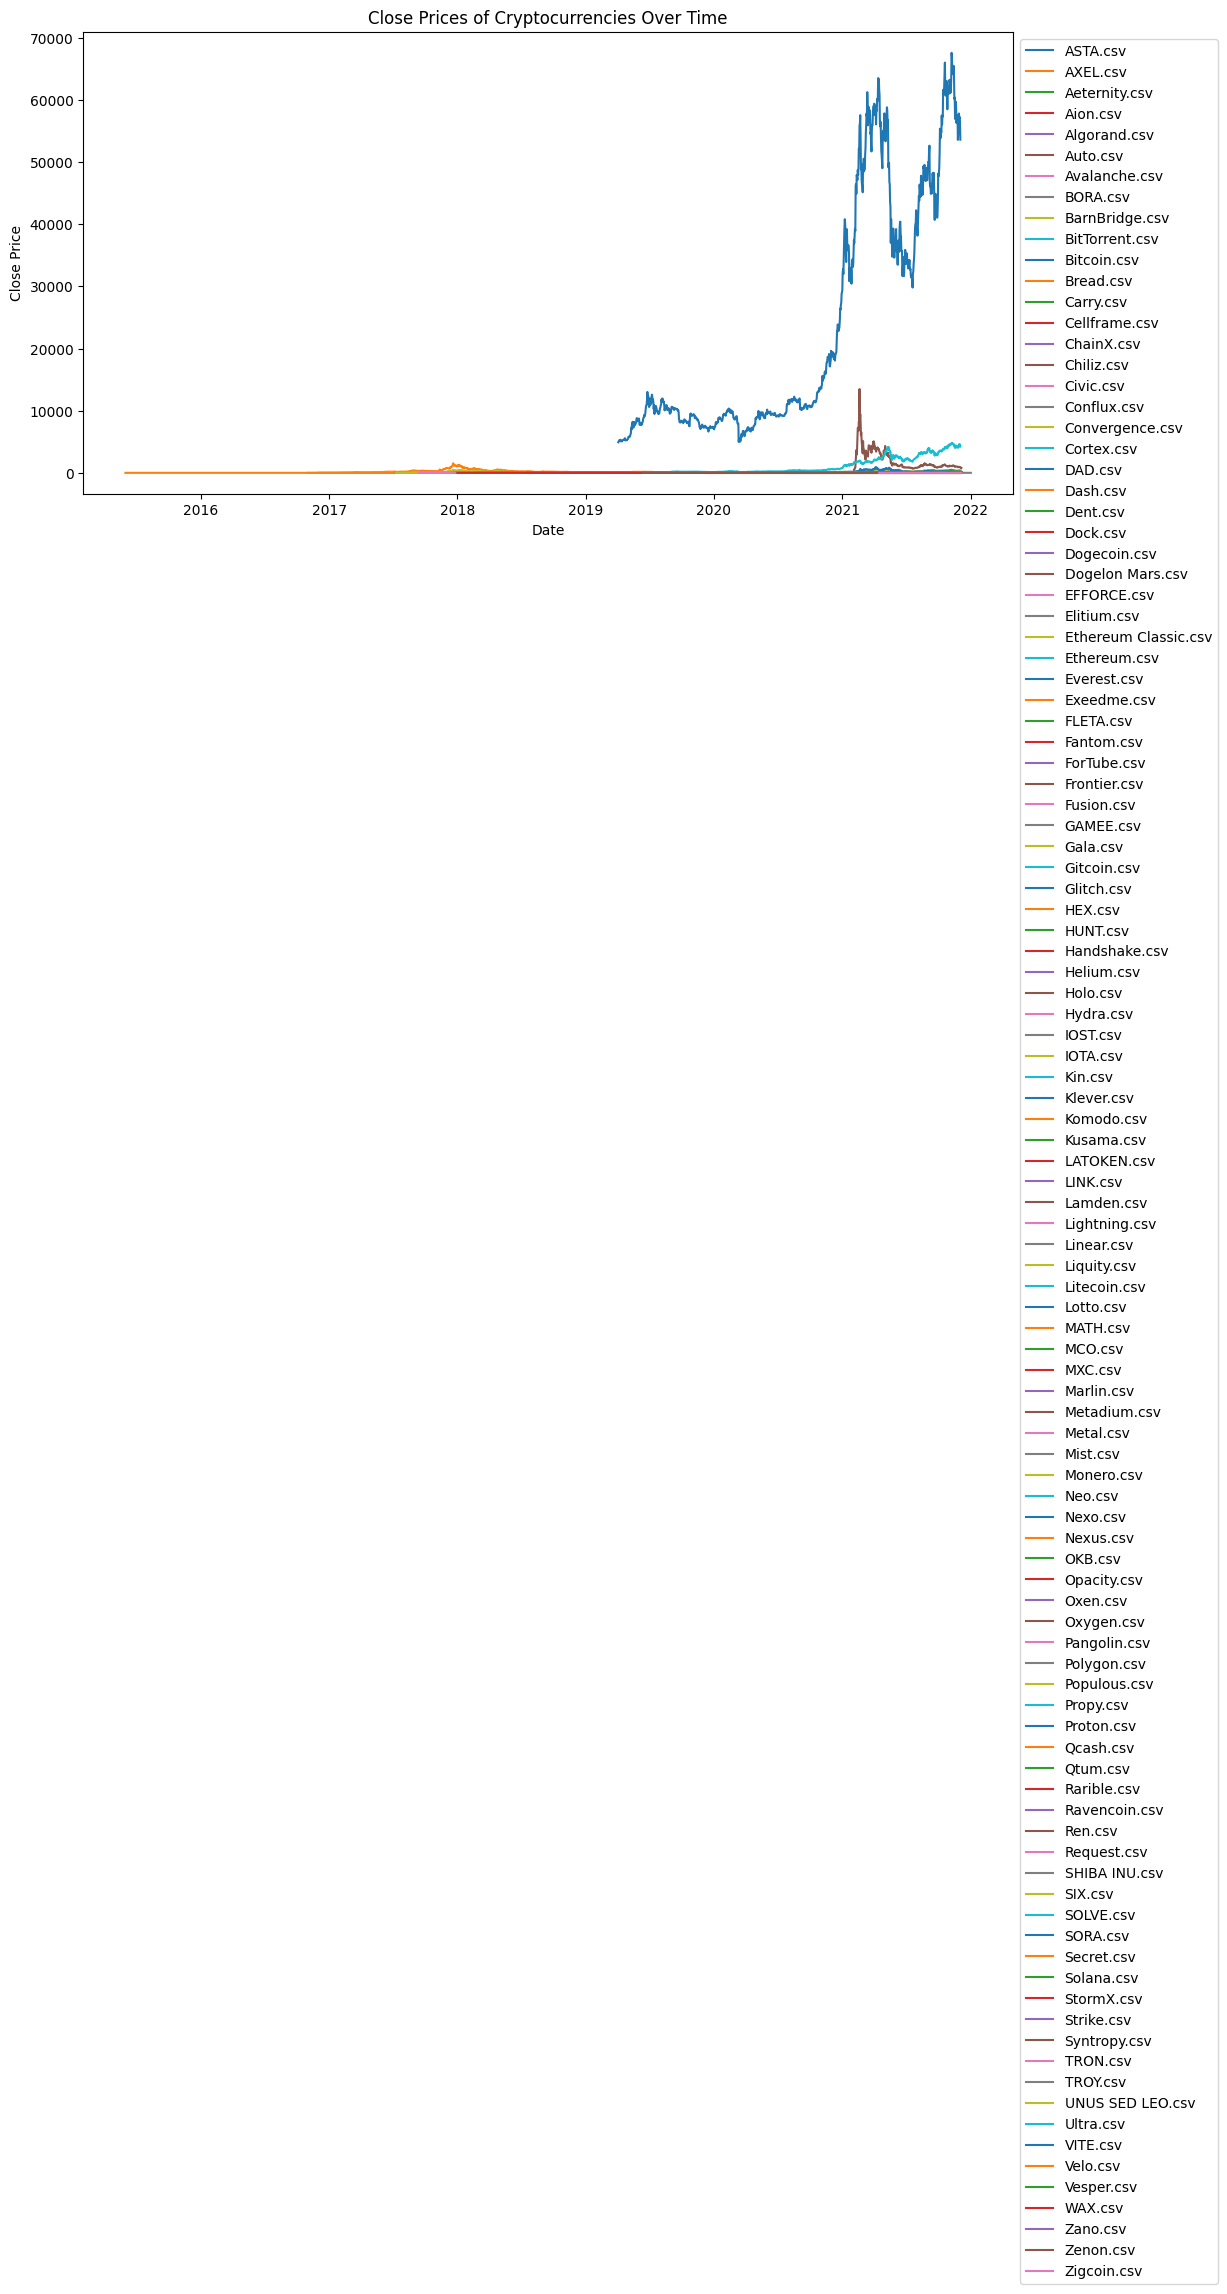

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming all_data is your DataFrame containing the cryptocurrency data
# Adjust column names based on your actual data

plt.figure(figsize=(12, 6))

# Specify the correct date format
all_data['Date'] = pd.to_datetime(all_data['Date'], format="%d-%m-%Y")

# Plot 'Close' prices for all cryptocurrencies
for crypto_name, group in all_data.groupby('Source.Name'):
    plt.plot(group['Date'], group['Close'], label=crypto_name)

plt.title('Close Prices of Cryptocurrencies Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


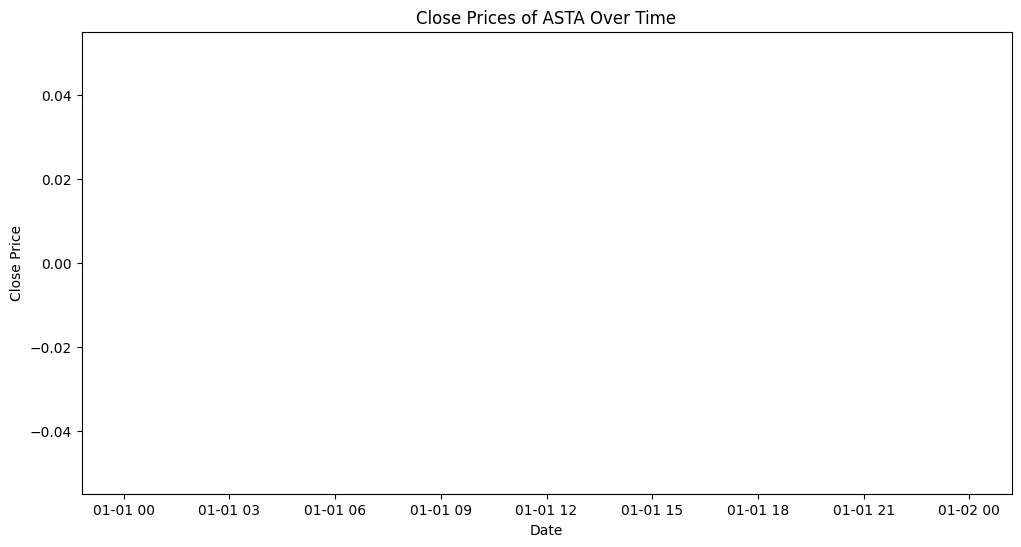

In [18]:
import matplotlib.pyplot as plt
import pandas as pd    #here user can enter its desirable crypto

# Assuming all_data is your DataFrame containing the cryptocurrency data
# Adjust column names based on your actual data

# Specify the correct date format
all_data['Date'] = pd.to_datetime(all_data['Date'], format="%d-%m-%Y")

# Get user input for the cryptocurrency name
crypto_input = input("Enter the cryptocurrency name: ")

# Plot 'Close' prices for the specified cryptocurrency
plt.figure(figsize=(12, 6))
plt.plot(all_data[all_data['Source.Name'] == crypto_input]['Date'],
         all_data[all_data['Source.Name'] == crypto_input]['Close'])
plt.title(f'Close Prices of {crypto_input} Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


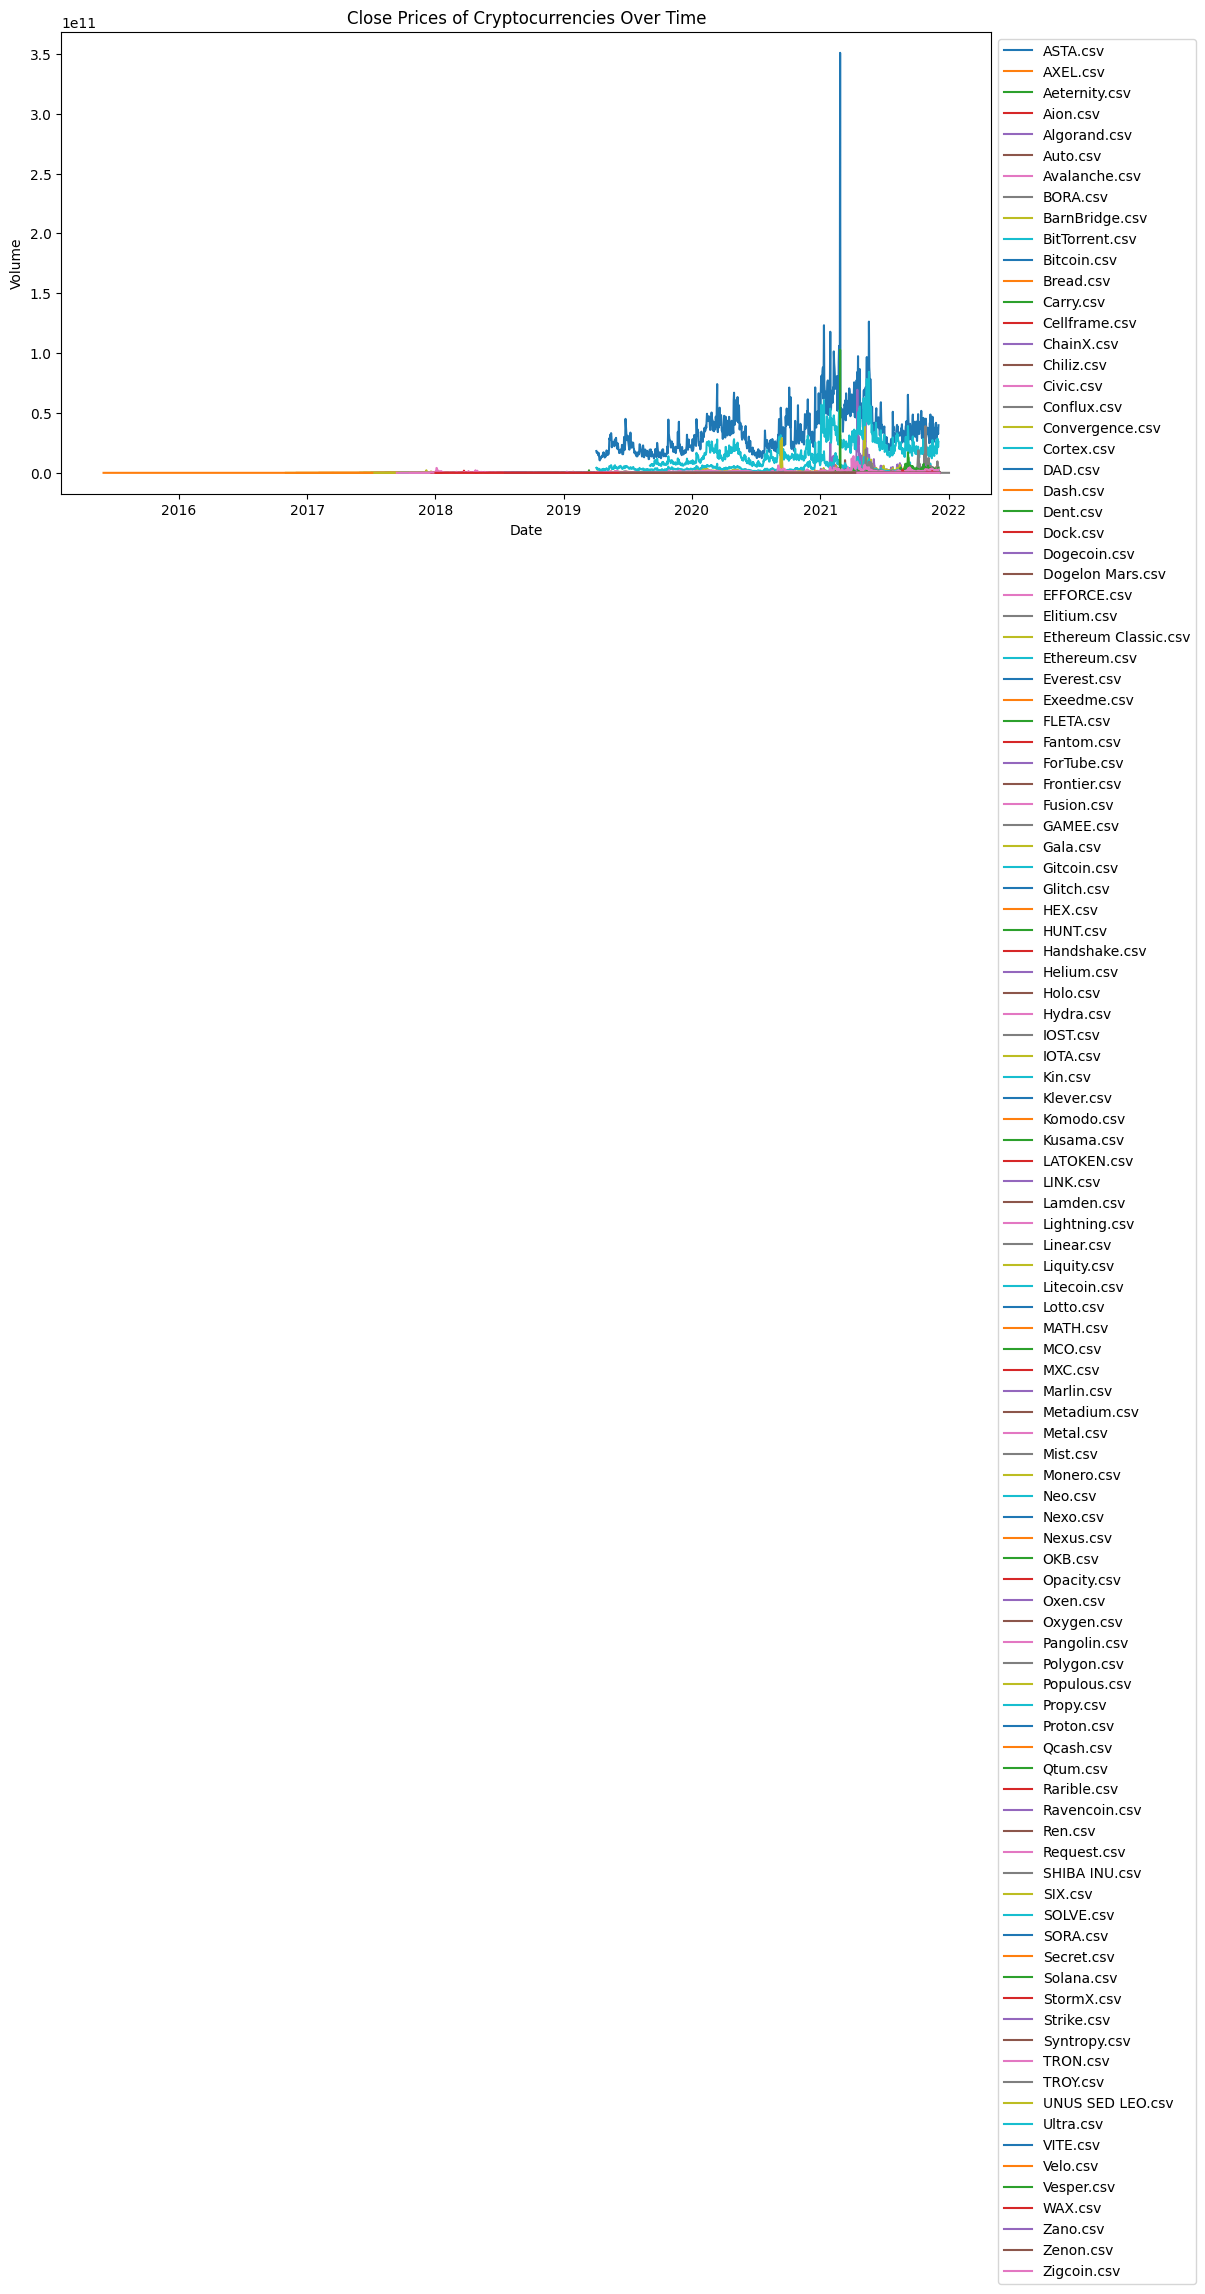

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming all_data is your DataFrame containing the cryptocurrency data
# Adjust column names based on your actual data

plt.figure(figsize=(12, 6))

# Specify the correct date format
all_data['Date'] = pd.to_datetime(all_data['Date'], format="%d-%m-%Y")

# Plot 'Close' prices for all cryptocurrencies
for crypto_name, group in all_data.groupby('Source.Name'):
    plt.plot(group['Date'], group['Volume'], label=crypto_name)

plt.title('Close Prices of Cryptocurrencies Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')    #here just change the parametre
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
import pandas as pd

# Assuming all_data is your DataFrame containing the cryptocurrency data
# Adjust column names based on your actual data

# Specify the correct date format
all_data['Date'] = pd.to_datetime(all_data['Date'], format="%d-%m-%Y")


# Filter DataFrame based on user input
selected_crypto_data = all_data[all_data['Source.Name'] == crypto_input]

# Convert selected data to JSON format
json_data = selected_crypto_data.to_json(orient='records')

# Print the JSON data
print(json_data)

# If you want to save the JSON data to a file, you can use the following:
# selected_crypto_data.to_json('output.json', orient='records')


[]


In [ ]:
selected_crypto_data.to_json('output.json', orient='records')
